In [1]:
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import pandas as pd
# You can also visualize the correlations using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load boston has been removed from sklearn due to ethical concerns
# loading in the dataset manually here just in order to follow along with the tutorial
column_names = [
    "CRIM", 
    "ZN", # proportion of residential land zoned for lots over 25,000 sq.ft.
    "INDUS", # proportion of non-retail business acres per town
    "CHAS", # Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    "NOX", # nitric oxides concentration (parts per 10 million)
    "RM", # average number of rooms per dwelling
    "AGE", # proportion of owner-occupied units built prior to 1940
    "DIS", # weighted distances to five Boston employment centers
    "RAD", # index of accessibility to radial highways
    "TAX", # full-value property-tax rate per $10,000
    "PTRATIO", # pupil-teacher ratio by town
    "B", # 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    "LSTAT", # % lower status of the population
    "MEDV" # Median value of owner-occupied homes in $1000s
]

boston = pd.read_csv('data/boston-housing-1970.csv',sep='\s+', names= column_names)

<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
/var/folders/ph/n6jkpvp953xc_fw0lt72nkf00000gn/T/ipykernel_2827/3454112531.py:20: SyntaxWarning: invalid escape sequence '\s'
  boston = pd.read_csv('data/boston-housing-1970.csv',sep='\s+', names= column_names)


Lets look into some EDA into the boston dataset

In [3]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

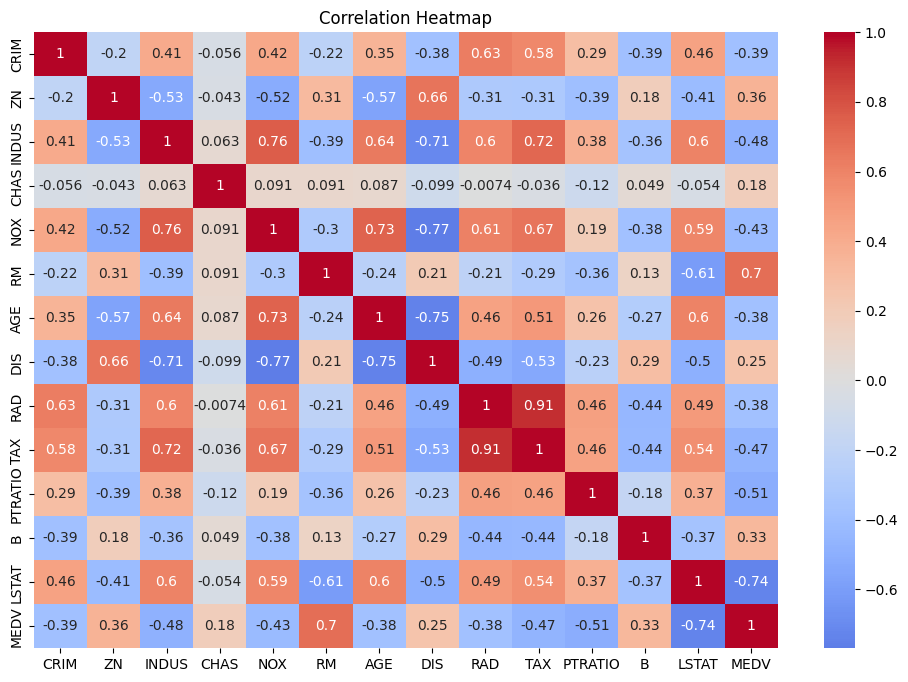

In [5]:
correlation_matrix = boston.corr()
print(correlation_matrix)

# Plot correlation matrix in heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


In [6]:
print(boston.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


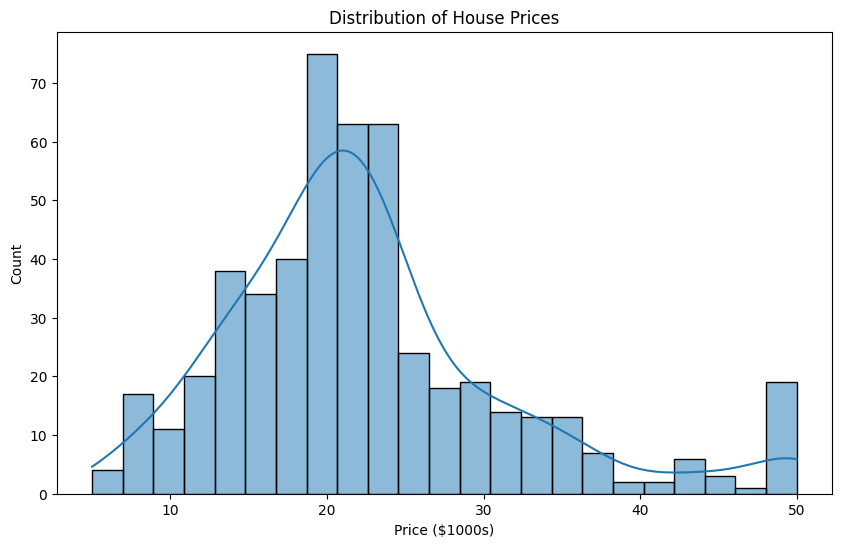

In [7]:
# Distribution of the target variable (house prices)
plt.figure(figsize=(10, 6))
sns.histplot(boston['MEDV'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price ($1000s)')
plt.ylabel('Count')
plt.show()

In [8]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(boston.drop('MEDV', axis=1))
y = boston['MEDV']

In [9]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate performance metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 21.894831181729202
R2 Score: 0.7406426641094095


In [10]:
# TODO: Apply multi-layer perception (MLPRegressor) 